## Importing Libraries & Setting up directories

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import os
os.chdir('C:\\Users\\breje\\OneDrive\\Desktop\\ML Dataset\\Deep Learning A-Z\\Deep_Learning_A_Z\\Volume 1 - Supervised Deep Learning\\Part 2 - Convolutional Neural Networks (CNN)\\Convolutional_Neural_Networks\\dataset')

In [3]:
my_dir = 'C:\\Users\\breje\\OneDrive\\Desktop\\ML Dataset\\Deep Learning A-Z\\Deep_Learning_A_Z\\Volume 1 - Supervised Deep Learning\\Part 2 - Convolutional Neural Networks (CNN)\\Convolutional_Neural_Networks\\dataset'

In [4]:
os.listdir(my_dir)

['.DS_Store', 'single_prediction', 'test_set', 'training_set']

In [5]:
train_dir = my_dir+'\\training_set'
test_dir = my_dir+'\\test_set'

## Exploring the Dataset

In [6]:
print(os.listdir(train_dir),os.listdir(test_dir))

['cats', 'dogs'] ['cats', 'dogs']


In [7]:
len(os.listdir(train_dir+'\\cats'))

4000

In [8]:
len(os.listdir(train_dir+'\\dogs'))

4000

In [9]:
len(os.listdir(test_dir+'\\cats'))

1000

In [10]:
len(os.listdir(test_dir+'\\dogs'))

1000

** We have 8000 training data and 200 testing data**

In [11]:
img_sample = train_dir+'\\dogs\\dog.2005.jpg'

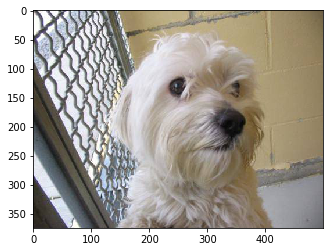

In [12]:
plt.imshow(imread(img_sample))

In [13]:
imread(img_sample).shape

(375, 499, 3)

In [14]:
dim1=[]
dim2=[]
col=[]
for i in os.listdir(train_dir+'\\dogs'):
    img = imread(train_dir+'\\dogs\\'+i)
    d1, d2, c1 = img.shape
    dim1.append(d1)
    dim2.append(d2)
    col.append(c1)

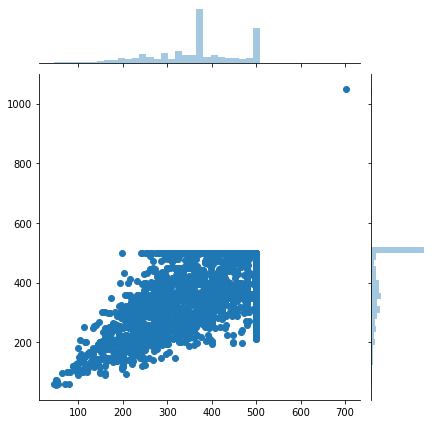

In [15]:
sns.jointplot(dim1, dim2)

In [16]:
print(np.mean(dim1), np.mean(dim2))

364.84475 397.98225


In [17]:
dim1=[]
dim2=[]
col=[]
for i in os.listdir(train_dir+'\\cats'):
    img = imread(train_dir+'\\cats\\'+i)
    d1, d2, c1 = img.shape
    dim1.append(d1)
    dim2.append(d2)
    col.append(c1)

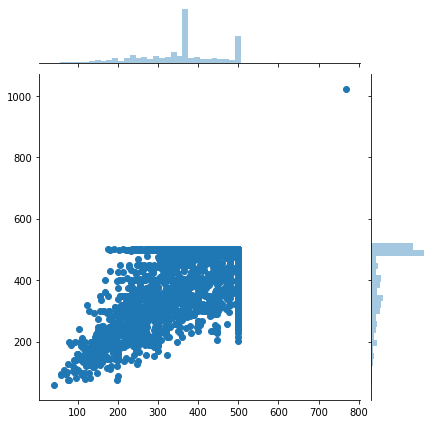

In [18]:
sns.jointplot(dim1, dim2)

In [19]:
print(np.mean(dim1), np.mean(dim2))

356.09925 409.61975


** 128x128 will be a right reshape size, due to my low budget laptop**

## Building the CNN model

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary', shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [24]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)

In [25]:
model.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set, callbacks=[early_stop])

Epoch 1/10
4000/4000 [==============================] - 8825s 2s/step - loss: 0.5466 - accuracy: 0.7063 - val_loss: 0.3599 - val_accuracy: 0.7930
Epoch 2/10
4000/4000 [==============================] - 8893s 2s/step - loss: 0.3334 - accuracy: 0.8544 - val_loss: 0.5987 - val_accuracy: 0.8405
Epoch 3/10
4000/4000 [==============================] - 8905s 2s/step - loss: 0.2321 - accuracy: 0.9040 - val_loss: 0.4697 - val_accuracy: 0.8405
Epoch 4/10
4000/4000 [==============================] - 8789s 2s/step - loss: 0.1782 - accuracy: 0.9277 - val_loss: 0.6420 - val_accuracy: 0.8400


## Model Training History

In [26]:
model_hist = pd.DataFrame(model.history.history)

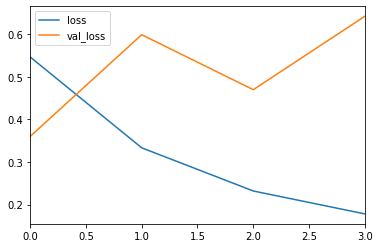

In [27]:
model_hist[['loss','val_loss']].plot()

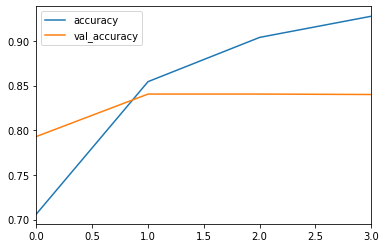

In [28]:
model_hist[['accuracy','val_accuracy']].plot()

## Model Evaluation

In [29]:
model.evaluate_generator(test_set)

[0.642022430896759, 0.8399999737739563]

In [30]:
pred = model.predict_generator(test_set)

In [31]:
pred = pd.DataFrame(pred)
pred

,0
0,0.052483
1,0.005684
2,0.001497
3,0.044680
4,0.000062
...,...
1995,1.000000
1996,0.999994
1997,0.060692
1998,0.999714


In [32]:
y_pred = pred>0.5

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
y_test = test_set.classes

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1000
           1       0.82      0.87      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [36]:
print(confusion_matrix(y_test, y_pred))

[[812 188]
 [132 868]]
